In [30]:
import sympy as sym
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<Axes: xlabel='x', ylabel='y'>

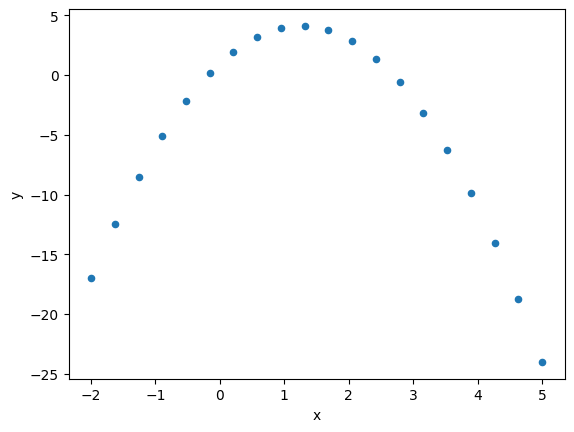

In [31]:
z = np.linspace(-2, 5, 20)
xy_df = pd.DataFrame({'x': z, 'y': -2*z**2 + 5*z + 1})
xy_df.plot.scatter(x='x', y='y')

In [32]:
x = sym.Symbol('x')
a, b, c = sym.symbols('a b c')

In [33]:
f = a*x**2 + b*x + c
f

a*x**2 + b*x + c

In [34]:
random.seed(42)
w = np.random.rand(3)

In [35]:
f.subs(dict(zip([a, b, c], w)))

0.871851842401103*x**2 + 0.517540626871884*x + 0.864581964253062

In [39]:
obecna_f = f.subs(dict(zip([a, b, c], w)))
predykcja_y = np.array([obecna_f.evalf(subs={x: x_val}) for x_val in range(20)])

In [37]:
predykcja_y

array([0.864581964253062, 2.25397443352605, 5.38707058760124,
       10.2638704264786, 16.8843739501582, 25.2485811586401,
       35.3564920519241, 47.2081066300103, 60.8034248928987,
       76.1424468405893], dtype=object)

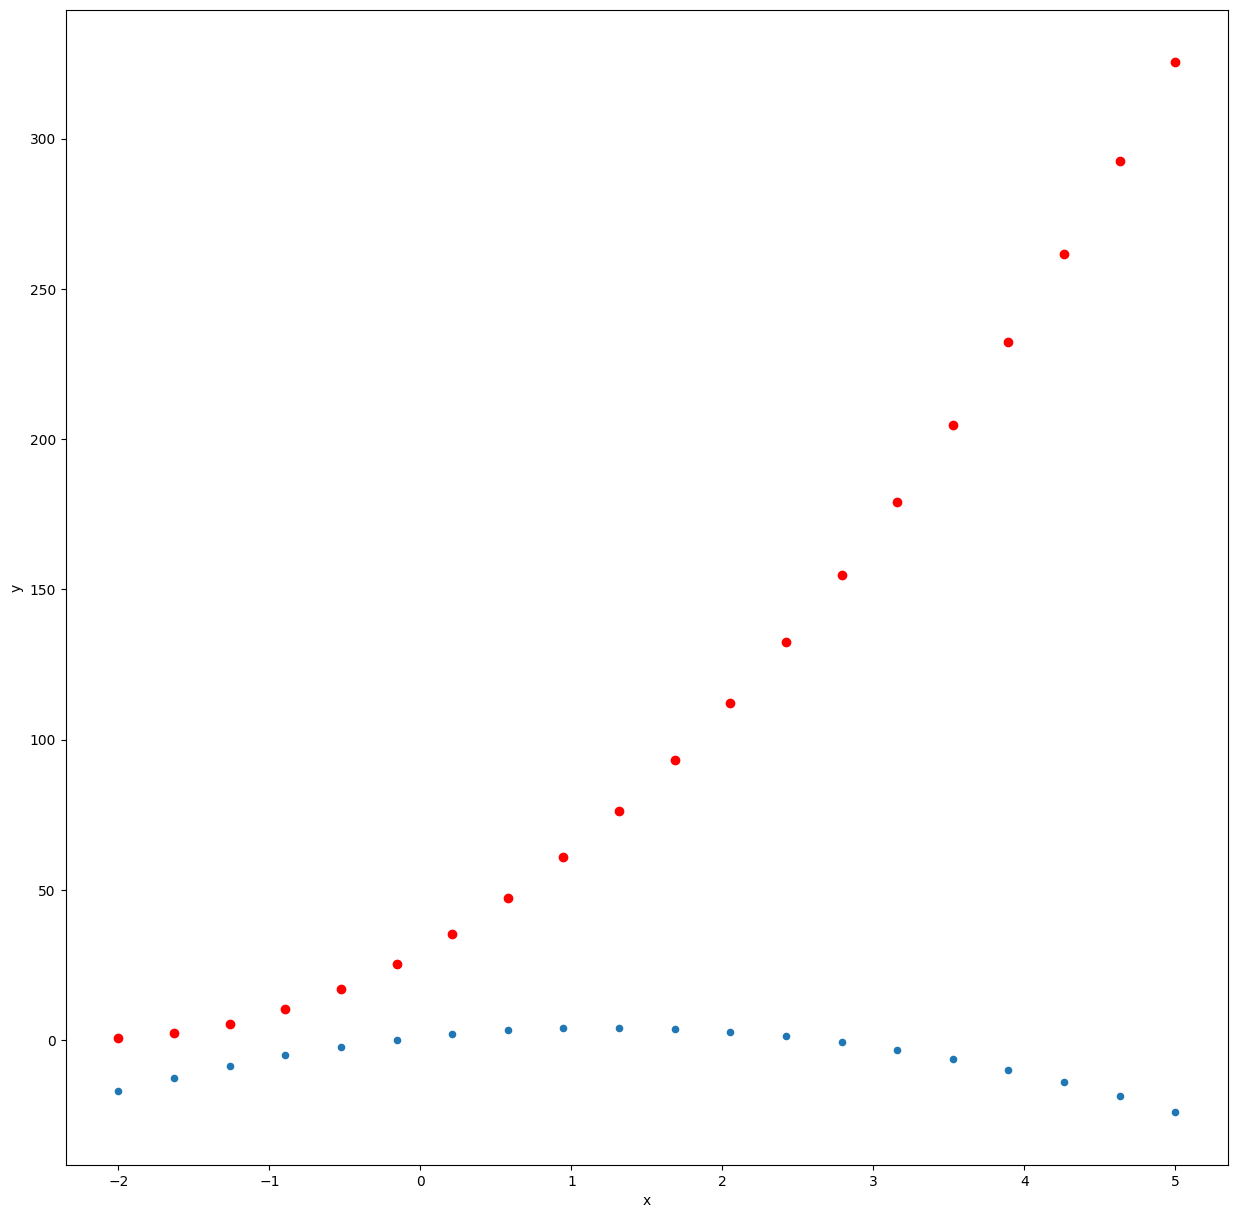

In [41]:
ax = xy_df.plot.scatter(x='x', y='y', figsize=(15, 15))
ax.scatter(x=xy_df['x'], y=predykcja_y, color='red')


No jest to słabe przybliżenie, ale wynika one z losowości


przejźmy teraz do Metody GD i zoptymalizujmy to

In [61]:
max_iter = 2000
gamma = 0.001

In [62]:
w_optimal = w
for i in range(max_iter):
    err = 0 
    for x_val, y_true in zip(xy_df['x'], xy_df['y']):
        y_pred = f.subs({x: x_val})
        err += (y_true - y_pred)**2
    err /= xy_df.shape[0]    

    grad = np.array([
        err.diff(a).evalf(subs=dict(zip([a,b,c], w_optimal))),
        err.diff(b).evalf(subs=dict(zip([a,b,c], w_optimal))),
        err.diff(c).evalf(subs=dict(zip([a,b,c], w_optimal)))
    ])
    
    w_optimal = w_optimal - gamma * grad

In [63]:
w_optimal

array([-1.98404722876863, 4.95677944343520, 0.911580103271707],
      dtype=object)

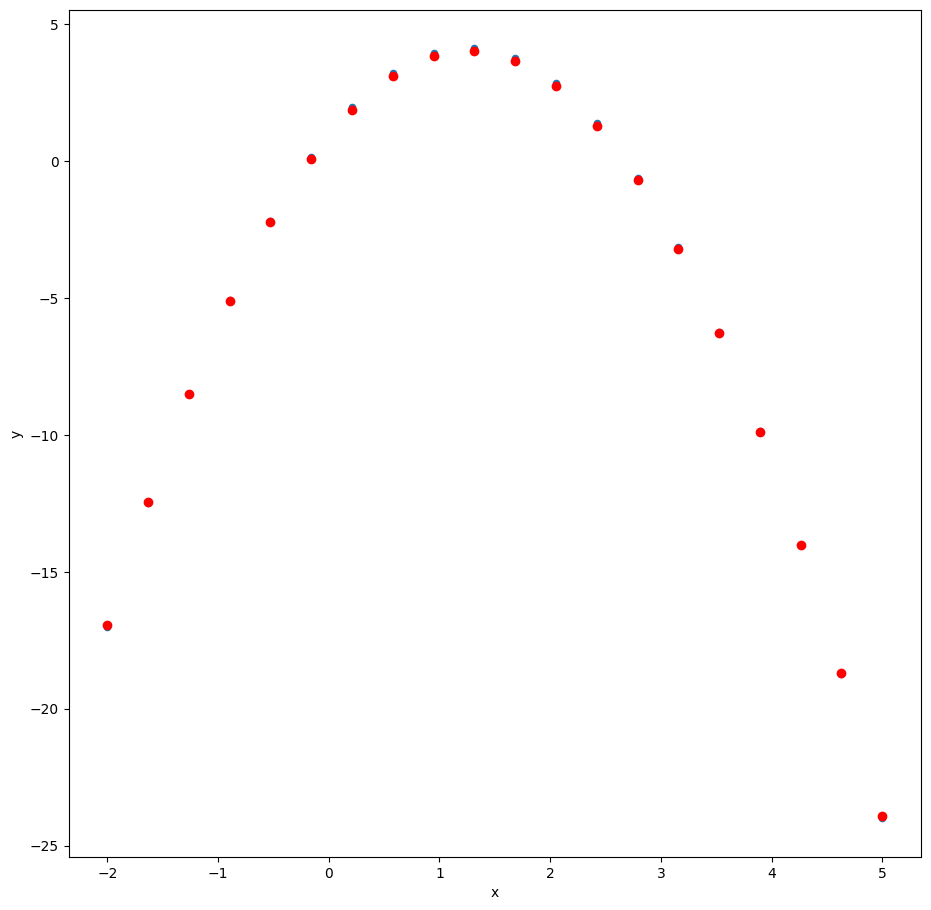

In [64]:
curr_f = f.subs(dict(zip([a,b,c], w_optimal)))
predykcja_y = np.array([curr_f.evalf(subs={x:x_val}) for x_val in xy_df['x']])
ax = xy_df.plot.scatter(x='x',y='y', figsize=(11,11))
ax.scatter(x=xy_df['x'], y=predykcja_y, c='r')


## Jak widać przybliżenie jest już całkiem dobre! &#128521;